# **Predicting House Prices: A Comparative Analysis of Neural Networks and Traditional Machine Learning Models**

## **About the Dataset**

Boston housing dataset: https://www.kaggle.com/datasets/altavish/boston-housing-dataset

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


## **Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

from google.colab import drive

## **Initial Data Exploration**

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data Sets/Housing Data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df = df.astype({'RAD':float, 'TAX':float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# shape of the dataset
print(df.shape)
print('Number of Rows:', df.shape[0])
print('Number of columns:', df.shape[1])

(506, 14)
Number of Rows: 506
Number of columns: 14


In [7]:
# summary statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## **Data Preprocessing**

### **Handing duplicated values**

In [8]:
# checking for duplicated rows
df.duplicated().sum()

0

### **Handling missing values**

In [9]:
# checking for the missing values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
# percentages of missing values
df.isnull().sum() / len(df) * 100

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64

Since the percentage of missing values in these columns are less than 5%, it is acceptable to drop the corresponding rows.

In [11]:
df = df.dropna()
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## **Exploratory Data Analysis (EDA)**

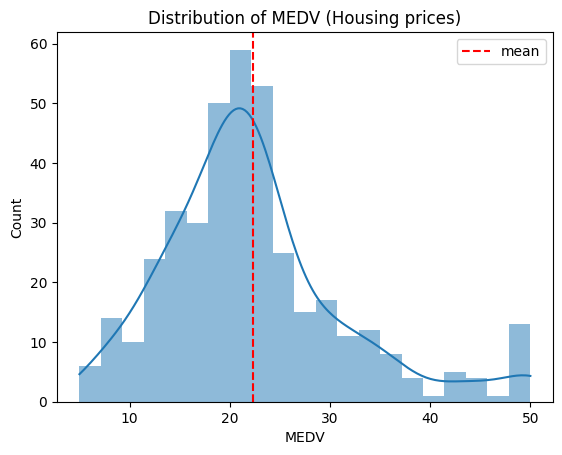

In [12]:
# Distribution of Dependent variable
sns.histplot(df['MEDV'], kde=True,  edgecolor='none')
plt.axvline(np.mean(df['MEDV']), c='red', ls='--', label='mean')
plt.title('Distribution of MEDV (Housing prices)')
plt.legend()

In [13]:
# Calculate the correlation coefficients
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


<Axes: >

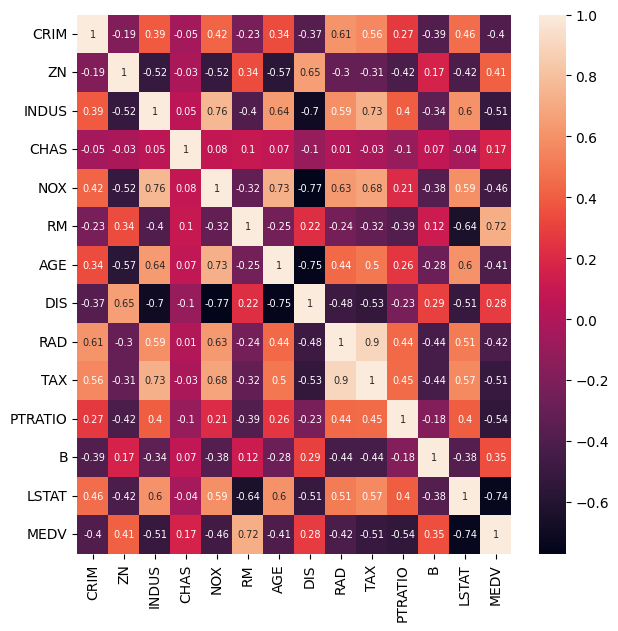

In [14]:
plt.figure(figsize=(7, 7))
sns.heatmap(np.round(df.corr(), 2), annot=True, annot_kws={"size": 7})

## **Split into features and target**

In [15]:
x = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

## **Standardize features by removing the mean and scaling to unit variance**

In [17]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [18]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## **Neural network model**

In [19]:
model = Sequential()

In [20]:
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))

#Output layer
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
8/8 [==============================] - 2s 105ms/step - loss: 528.9600 - mean_absolute_error: 21.1223 - val_loss: 499.9029 - val_mean_absolute_error: 20.8505
Epoch 2/100
8/8 [==============================] - 0s 26ms/step - loss: 468.9336 - mean_absolute_error: 19.6617 - val_loss: 440.0611 - val_mean_absolute_error: 19.3979
Epoch 3/100
8/8 [==============================] - 0s 14ms/step - loss: 399.2465 - mean_absolute_error: 17.9311 - val_loss: 368.7302 - val_mean_absolute_error: 17.5306
Epoch 4/100
8/8 [==============================] - 0s 23ms/step - loss: 317.9656 - mean_absolute_error: 15.7680 - val_loss: 286.1086 - val_mean_absolute_error: 15.1224
Epoch 5/100
8/8 [==============================] - 0s 22ms/step - loss: 232.8150 - mean_absolute_error: 13.2319 - val_loss: 200.4204 - val_mean_absolute_error: 12.3414
Epoch 6/100
8/8 [==============================] - 0s 20ms/step - loss: 146.0525 - mean_absolute_error: 10.2330 - val_loss: 129.0829 - val_mean_absolute_error:

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


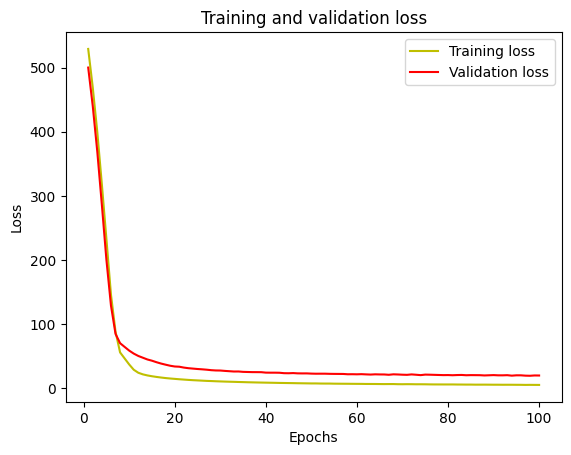

In [22]:
# plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

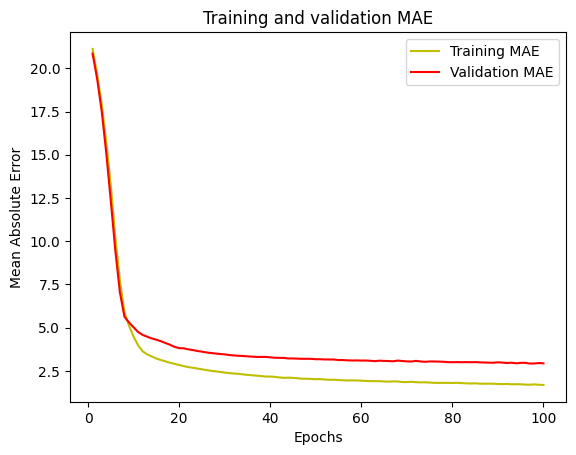

In [23]:
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
plt.plot(epochs, mae, 'y', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

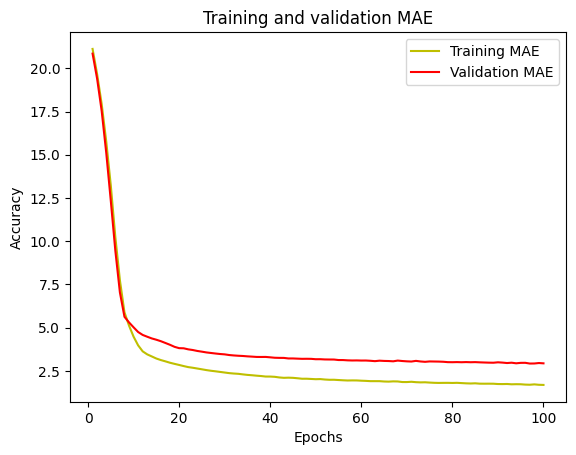

In [24]:
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
plt.plot(epochs, mae, 'y', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# Get predictions with the trained neural network model
nn_preds = model.predict(x_test_scaled)

3/3 [==============================] - 0s 5ms/step


In [26]:
# See the actual and predicted values for 1st 5 datapoints of test data
results_df = pd.DataFrame({'Actual Value': y_test[:10], 'Predicted Value': nn_preds[:10].flatten()})
print(results_df)

     Actual Value  Predicted Value
13           20.4        17.689655
455          14.1        13.486576
141          14.4        14.215719
491          13.6        16.557716
21           19.6        16.603704
298          22.5        24.863102
218          21.5        20.979240
40           34.9        35.242474
470          19.9        17.343060
299          29.0        33.260567


In [27]:
# Evaluate the model
nn_mse = mean_squared_error(y_test, nn_preds)
nn_mae = mean_absolute_error(y_test, nn_preds)

print("Neural Network Mean Squared Error:", nn_mse)
print("Neural Network Mean Absolute Error:", nn_mae)

Neural Network Mean Squared Error: 15.402628442189437
Neural Network Mean Absolute Error: 2.4668661491780344


## **Comparison with other ML models**

### **Linear Regression**

In [28]:
linear_reg = LinearRegression()
linear_reg.fit(x_train_scaled, y_train)
linear_reg_preds = linear_reg.predict(x_test_scaled)

# Evaluate the model
linear_reg_mse = mean_squared_error(y_test, linear_reg_preds)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)

print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("Linear Regression Mean Absolute Error:", linear_reg_mae)

Linear Regression Mean Squared Error: 18.763177563093123
Linear Regression Mean Absolute Error: 3.2682784296779612


### **Ridge Regression**

In [29]:
# Perform Gridsearch
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(x_train_scaled, y_train)

ridge_grid.best_estimator_

Ridge(alpha=10)

In [30]:
# Perform Ridge regression
ridge_model = Ridge(alpha=10)
ridge_model.fit(x_train_scaled, y_train)
best_ridge_reg = ridge_grid.best_estimator_
ridge_reg_preds = best_ridge_reg.predict(x_test_scaled)

In [31]:
# Evaluate the model
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_preds)
ridge_reg_mae = mean_absolute_error(y_test, ridge_reg_preds)

print("Ridge Regression Mean Squared Error:", ridge_reg_mse)
print("Ridge Regression Mean Absolute Error:", ridge_reg_mae)

Ridge Regression Mean Squared Error: 19.05662675458317
Ridge Regression Mean Absolute Error: 3.307938623567764


### **Decision tree**

In [32]:
decision_tree = DecisionTreeRegressor(random_state=20)
decision_tree.fit(x_train_scaled, y_train)
decision_tree_preds = decision_tree.predict(x_test_scaled)

# Evaluate the model
decision_tree_mse = mean_squared_error(y_test, decision_tree_preds)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_preds)

print("Decision Tree Regressor Mean Squared Error:", decision_tree_mse)
print("Decision Tree Regressor Mean Absolute Error:", decision_tree_mae)

Decision Tree Regressor Mean Squared Error: 21.63683544303797
Decision Tree Regressor Mean Absolute Error: 2.831645569620253


### **Random Forest Regressor**

In [33]:
random_forest = RandomForestRegressor(random_state=20)
random_forest.fit(x_train_scaled, y_train)
random_forest_preds = random_forest.predict(x_test_scaled)

# Evaluate the model
random_forest_mse = mean_squared_error(y_test, random_forest_preds)
random_forest_mae = mean_absolute_error(y_test, random_forest_preds)

print("Random Forest Regressor Mean Squared Error:", random_forest_mse)
print("Random Forest Regressor Mean Absolute Error:", random_forest_mae)

Random Forest Regressor Mean Squared Error: 13.738271822784808
Random Forest Regressor Mean Absolute Error: 2.215569620253165


### **Gradient Boosting Regressor**

In [34]:
gradient_boosting = GradientBoostingRegressor(random_state=20)
gradient_boosting.fit(x_train_scaled, y_train)
gradient_boosting_preds = gradient_boosting.predict(x_test_scaled)

# Evaluate the model
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_preds)
gradient_boosting_mae = mean_absolute_error(y_test, gradient_boosting_preds)

print("Gradient Boosting Regressor Mean Squared Error:", gradient_boosting_mse)
print("Gradient Boosting Regressor Mean Absolute Error:", gradient_boosting_mae)

Gradient Boosting Regressor Mean Squared Error: 12.408851276594529
Gradient Boosting Regressor Mean Absolute Error: 2.181573611478133


### **XGBoost Regression**

In [35]:
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=20)
xgb_reg.fit(x_train_scaled, y_train)
xgb_reg_preds = xgb_reg.predict(x_test_scaled)

# Evaluate the model
xgb_reg_mse = mean_squared_error(y_test, xgb_reg_preds)
xgb_reg_mae = mean_absolute_error(y_test, xgb_reg_preds)

print("XGBoost Regression Mean Squared Error:", xgb_reg_mse)
print("XGBoost Regression Mean Absolute Error:", xgb_reg_mae)

XGBoost Regression Mean Squared Error: 12.587614392466946
XGBoost Regression Mean Absolute Error: 2.1867463606822337


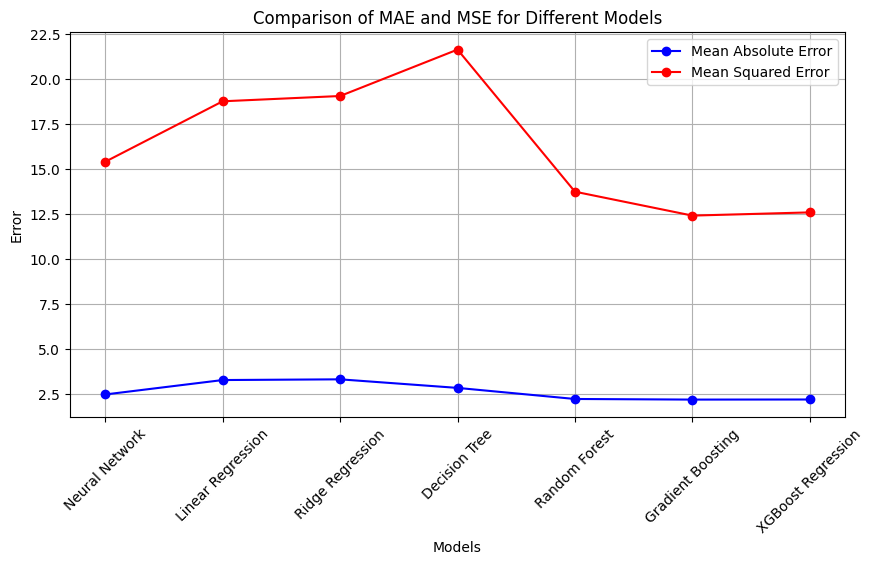

In [44]:
model_names = ['Neural Network', 'Linear Regression', 'Ridge Regression', 'Decision Tree',
               'Random Forest', 'Gradient Boosting', 'XGBoost Regression']
mae_values = [nn_mae, linear_reg_mae, ridge_reg_mae, decision_tree_mae,
              random_forest_mae, gradient_boosting_mae, xgb_reg_mae]
mse_values = [nn_mse, linear_reg_mse, ridge_reg_mse, decision_tree_mse,
              random_forest_mse, gradient_boosting_mse, xgb_reg_mse]

# Plotting MAE and MSE for each model
fig, ax = plt.subplots(figsize=(10, 5))

index = np.arange(len(model_names))

# Plotting lines for MAE
ax.plot(index, mae_values, marker='o', linestyle='-', label='Mean Absolute Error', color='b')

# Plotting lines for MSE
ax.plot(index, mse_values, marker='o', linestyle='-', label='Mean Squared Error', color='r')

ax.set_xlabel('Models')
ax.set_ylabel('Error')
ax.set_title('Comparison of MAE and MSE for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

plt.grid(True)
plt.show()

In [39]:
# Create a DataFrame with actual and predicted values for the first 10 rows
results_df = pd.DataFrame({
    'Actual Value': y_test[:10],
    'Neural Network Predicted Value': nn_preds[:10].flatten(),
    'Linear Regression Predicted Value': linear_reg_preds[:10],
    'Ridge Regression Predicted Value': ridge_reg_preds[:10],
    'Decision Tree Predicted Value': decision_tree_preds[:10],
    'Random Forest Predicted Value': random_forest_preds[:10],
    'Gradient Boosting Predicted Value': gradient_boosting_preds[:10],
    'XGBoost Regression Predicted Value': xgb_reg_preds[:10],
})

results_df

,Actual Value,Neural Network Predicted Value,Linear Regression Predicted Value,Ridge Regression Predicted Value,Decision Tree Predicted Value,Random Forest Predicted Value,Gradient Boosting Predicted Value,XGBoost Regression Predicted Value
13,20.4,17.689655,19.169192,19.514291,19.9,20.295,20.965975,20.406387
455,14.1,13.486576,16.160021,16.213793,16.1,14.554,14.209698,15.044269
141,14.4,14.215719,4.840620,5.188351,11.8,12.700,11.453382,12.148001
491,13.6,16.557716,14.235149,15.125435,15.2,14.734,15.072638,15.285361
21,19.6,16.603704,17.405552,17.692917,19.2,19.184,17.703897,18.753487
298,22.5,24.863102,29.457386,29.487829,23.5,24.209,24.981049,23.827072
218,21.5,20.979240,25.053782,24.687049,21.7,20.501,19.370645,20.433971
40,34.9,35.242474,34.276886,33.856585,36.1,35.727,37.925344,40.058266
470,19.9,17.343060,20.728228,20.370650,15.2,17.055,17.466092,16.296259
299,29.0,33.260567,32.847852,32.915908,32.9,33.567,34.795961,33.729366
